### importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans 
import cufflinks as cf
import plotly.graph_objs as go
from plotly.graph_objs import Figure, Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cf.go_offline()


#### reading iris dataset csv file

In [4]:
dataset = pd.read_csv('Iris.csv')

In [5]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### removing Id and Species column

In [6]:
dataset.dropna(inplace=True)
dataset.drop(['Id','Species'], axis = 1 , inplace=True)

In [7]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### standardizing the dataset to bring down into same scale

In [13]:
sd = StandardScaler()

In [14]:
scaled_data = sd.fit_transform(dataset)

In [15]:
dataset = pd.DataFrame(scaled_data, columns=dataset.columns)

In [16]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
df = dataset.copy(deep=True)

#### using pca method to decompose the dimensions

In [26]:
pca = PCA()

In [29]:
decomposed_data = pca.fit_transform(dataset)

#### we can calculate the explained variance for each attribute by using scikit-learn, and plot the result

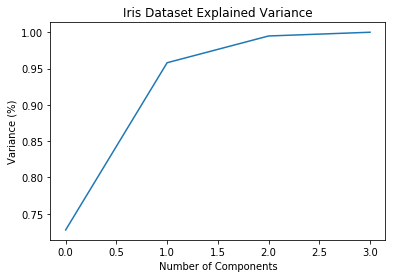

In [32]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Iris Dataset Explained Variance')
plt.show()

This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [33]:
pca = PCA(n_components=2)

In [34]:
decomposed_data = pca.fit_transform(dataset)

In [35]:
columns = ['component#%i' % i for i in range(2)]

In [36]:
decomposed_df = pd.DataFrame(decomposed_data, columns=columns)

In [37]:
decomposed_df.head()

,component#0,component#1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [38]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

#### Using elbow method to compute the clusters

In [39]:
wcss = []
clusters = []
d = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10,
                    max_iter=300)
    kmeans.fit_predict(dataset)
    wcss.append(kmeans.inertia_)
    clusters.append(k)

#### using plotly method to plot elbow curve

In [41]:
data = {
                "type": "scatter",
                "x": clusters,
                "y": wcss
            }

data = Data([data])
layout = go.Layout(
    title="Computing WCSS for KMeans++",
    yaxis=dict(title='Sum of squared errors'),
    xaxis=dict(title='Number of clusters'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = Figure(data=data, layout=layout)
fig.show()

as per above graph 5 clusters seems good to proceed further

In [42]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10,
                    max_iter=300)

In [43]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.fit(decomposed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.labels_

array([4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 0, 2, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1], dtype=int32)

#### adding cluters into original dataframe

In [46]:
dataset.insert(loc=0, column='clusters', value=pd.Series(kmeans.labels_).astype(int))

In [47]:
dataset.head(10)

,clusters,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4,-0.900681,1.032057,-1.341272,-1.312977
1,0,-1.143017,-0.124958,-1.341272,-1.312977
2,0,-1.385353,0.337848,-1.398138,-1.312977
3,0,-1.506521,0.106445,-1.284407,-1.312977
4,4,-1.021849,1.263460,-1.341272,-1.312977
5,4,-0.537178,1.957669,-1.170675,-1.050031
6,0,-1.506521,0.800654,-1.341272,-1.181504
7,0,-1.021849,0.800654,-1.284407,-1.312977
8,0,-1.748856,-0.356361,-1.341272,-1.312977
9,0,-1.143017,0.106445,-1.284407,-1.444450


#### adding clusters colums to decomposed dataframe for plotting the cluters

In [64]:
decomposed_df.insert(loc=0, column='clusters', value=pd.Series(kmeans.labels_).astype(int))

In [48]:
dataset['clusters'].value_counts()

1    47
2    28
4    26
3    25
0    24
Name: clusters, dtype: int64

* seems clusters1 has max datapoints

In [49]:
kmeans.cluster_centers_

array([[-2.23801679, -0.46519921],
       [ 0.98713998, -0.11763931],
       [ 2.05721014,  0.85674839],
       [ 0.28048804, -1.32284594],
       [-2.20374081,  0.99138547]])

#### creating dataframe for centers

In [57]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = decomposed_df.columns)

In [58]:
centroid_df.head()

,component#0,component#1
0,-2.238017,-0.465199
1,0.987140,-0.117639
2,2.057210,0.856748
3,0.280488,-1.322846
4,-2.203741,0.991385


In [63]:
dataset.head()

,clusters,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4,-0.900681,1.032057,-1.341272,-1.312977
1,0,-1.143017,-0.124958,-1.341272,-1.312977
2,0,-1.385353,0.337848,-1.398138,-1.312977
3,0,-1.506521,0.106445,-1.284407,-1.312977
4,4,-1.021849,1.263460,-1.341272,-1.312977


In [72]:
clusters = decomposed_df['clusters'].unique()

columns = decomposed_df.columns[1:]

symbol = ('circle', 'square', 'triangle-up', 'diamond', 'cross', 'x',
                  'triangle-down', 'asterisk', 'octagon', 'diamond-tall-down')
color = ('yellow','blue',  'magenta', 'green', 'teal', 'navy','peru',
                 'lightslategrey', 'red', 'olive')

plot_data = []

for c in clusters:
    trace1 = {
      "mode": "markers", 
      "name": "cluster"+str(c),
      "type": "scatter", 
      "x": decomposed_df.loc[decomposed_df['clusters']==c][columns[0]], 
      "y": decomposed_df.loc[decomposed_df['clusters']==c][columns[1]],
      "marker": {
        "line": {
          "color": "navy", 
          "width": 0.5
        }, 
        "size": 12, 
        "color": color[c],
        "symbol": symbol[c]
      }
    }
    trace2 = {
      "name": "centroid"+str(c),
      "type": "scatter", 
      "x": [df[columns[0]][c]], 
      "y": [df[columns[1]][c]],
      "marker": {
        "color": "rgb(200,10,10)", 
        "symbol": symbol[c]
      }
    }
    plot_data.append(trace1)
    plot_data.append(trace2)
    
data = Data(plot_data)
layout = {
    "title": "K-Means Clustering (k=%s)" % len(clusters),
    "xaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "yaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "legend": {"font": {"size": 16}},
    "titlefont": {"size": 24}
}
fig = Figure(data=data, layout=layout)
fig.show()